# Homework 1. Exploratory Data Analysis

Due: Thursday, September 18, 2014 11:59 PM

<a href=https://raw.githubusercontent.com/cs109/2014/master/homework/HW1.ipynb download=HW1.ipynb> Download this assignment</a>

---

## Introduction

In this homework we ask you three questions that we expect you to answer using data. For each question we ask you to complete a series of tasks that should help guide you through the data analysis. Complete these tasks and then write a short (100 words or less) answer to the question.

**Note**: We will briefly discuss this homework assignment on Thursday in class.

#### Data
For this assignment we will use two databases: 

1. The [Sean Lahman's Baseball Database](http://seanlahman.com/baseball-archive/statistics) which contains the "complete batting and pitching statistics from 1871 to 2013, plus fielding statistics, standings, team stats, managerial records, post-season data, and more. For more details on the latest release, please [read the documentation](http://seanlahman.com/files/database/readme2012.txt)."

2. [Gapminder](http://www.gapminder.org) is a great resource that contains over [500 data sets](http://www.gapminder.org/data/) related to world indicators such as income, GDP and life expectancy. 


#### Purpose

In this assignment, you will learn how to: 

a. Load in CSV files from the web. 

b. Create functions in python. 

C. Create plots and summary statistics for exploratory data analysis such as histograms, boxplots and scatter plots. 


#### Useful libraries for this assignment 

* [numpy](http://docs.scipy.org/doc/numpy-dev/user/index.html), for arrays
* [pandas](http://pandas.pydata.org/), for data frames
* [matplotlib](http://matplotlib.org/), for plotting

---

In [8]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model


## Problem 1

In Lecture 1, we showed a plot that provided evidence that the 2002 and 2003 Oakland A's, a team that used data science, had a competitive advantage. Since, others teams have started using data science as well. Use exploratory data analysis to determine if the competitive advantage has since disappeared. 

#### Problem 1(a) 
Load in [these CSV files](http://seanlahman.com/files/database/lahman-csv_2014-02-14.zip) from the [Sean Lahman's Baseball Database](http://seanlahman.com/baseball-archive/statistics). For this assignment, we will use the 'Salaries.csv' and 'Teams.csv' tables. Read these tables into a pandas `DataFrame` and show the head of each table. 

**Hint** Use the [requests](http://docs.python-requests.org/en/latest/), [StringIO](http://docs.python.org/2/library/stringio.html) and [zipfile](https://docs.python.org/2/library/zipfile.html) modules to get from the web.  

In [2]:
#your code here
import requests, zipfile, StringIO
req=requests.get("http://seanlahman.com/files/database/lahman-csv_2015-01-24.zip")
type(req)
zipf = zipfile.ZipFile(StringIO.StringIO(req.content))
salaries = pd.read_csv(zipf.open('Salaries.csv'))
teams = pd.read_csv(zipf.open('Teams.csv'))
type(teams)

print teams.head()
print salaries.head()



   yearID lgID teamID franchID divID  Rank   G  Ghome   W   L     ...       \
0    1871  NaN    BS1      BNA   NaN     3  31    NaN  20  10     ...        
1    1871  NaN    CH1      CNA   NaN     2  28    NaN  19   9     ...        
2    1871  NaN    CL1      CFC   NaN     8  29    NaN  10  19     ...        
3    1871  NaN    FW1      KEK   NaN     7  19    NaN   7  12     ...        
4    1871  NaN    NY2      NNA   NaN     5  33    NaN  16  17     ...        

   DP    FP                     name                          park  \
0 NaN  0.83     Boston Red Stockings           South End Grounds I   
1 NaN  0.82  Chicago White Stockings       Union Base-Ball Grounds   
2 NaN  0.81   Cleveland Forest Citys  National Association Grounds   
3 NaN  0.80     Fort Wayne Kekiongas                Hamilton Field   
4 NaN  0.83         New York Mutuals      Union Grounds (Brooklyn)   

   attendance  BPF  PPF  teamIDBR  teamIDlahman45  teamIDretro  
0         NaN  103   98       BOS            

#### Problem 1(b)

Summarize the Salaries DataFrame to show the total salaries for each team for each year. Show the head of the new summarized DataFrame. 

In [9]:
#your code here
grouped = salaries.groupby(['yearID','teamID'], as_index=False)
salarySum = grouped.sum()
salarySum.head()

,yearID,teamID,salary
0,1985,ATL,14807000
1,1985,BAL,11560712
2,1985,BOS,10897560
3,1985,CAL,14427894
4,1985,CHA,9846178


#### Problem 1(c)

Merge the new summarized Salaries DataFrame and Teams DataFrame together to create a new DataFrame
showing wins and total salaries for each team for each year year. Show the head of the new merged DataFrame.

**Hint**: Merge the DataFrames using `teamID` and `yearID`.

In [10]:
#your code here
merged = pd.merge(salarySum, teams, how='inner', on=['yearID','teamID'] )
merged.head()
lessColummns = merged[['yearID','teamID','salary','W']]
lessColummns.head()

,yearID,teamID,salary,W
0,1985,ATL,14807000,66
1,1985,BAL,11560712,83
2,1985,BOS,10897560,81
3,1985,CAL,14427894,90
4,1985,CHA,9846178,85


#### Problem 1(d)

How would you graphically display the relationship between total wins and total salaries for a given year? What kind of plot would be best? Choose a plot to show this relationship and specifically annotate the Oakland baseball team on the on the plot. Show this plot across multiple years. In which years can you detect a competitive advantage from the Oakland baseball team of using data science? When did this end? 

**Hints**: Use a `for` loop to consider multiple years. Use the `teamID` (three letter representation of the team name) to save space on the plot.  

[1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999
 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014]


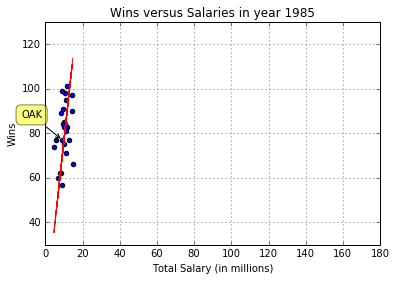

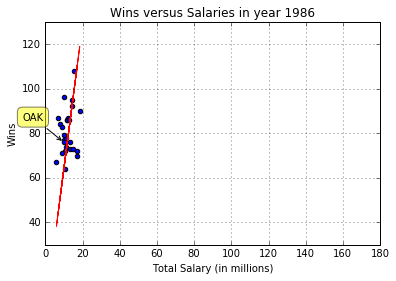

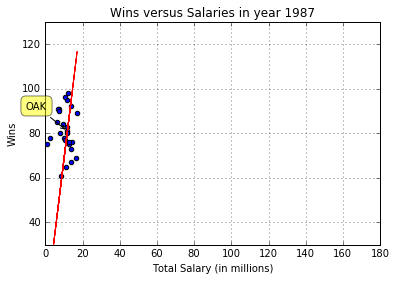

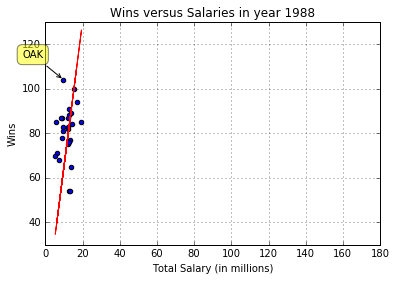

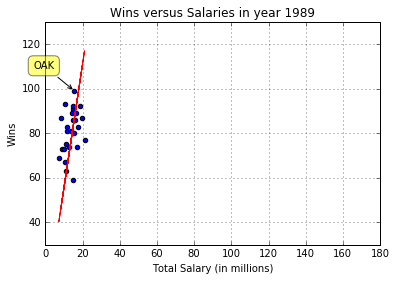

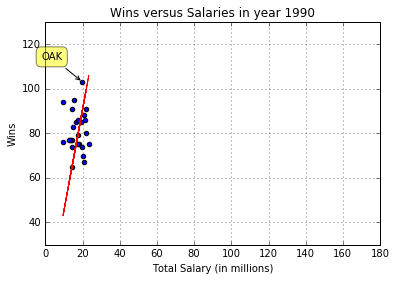

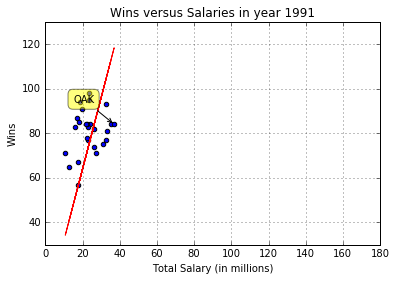

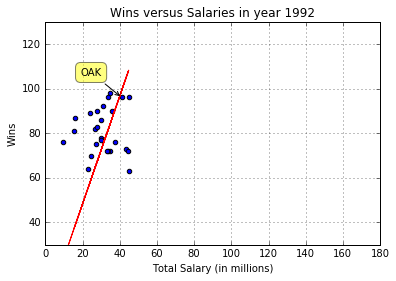

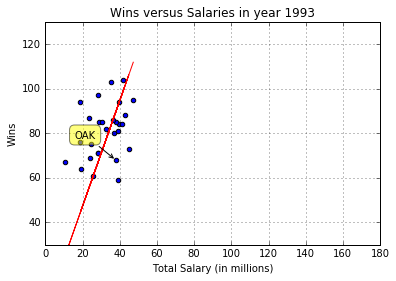

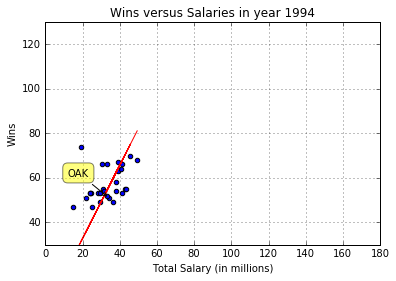

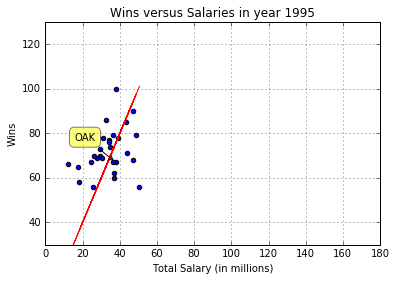

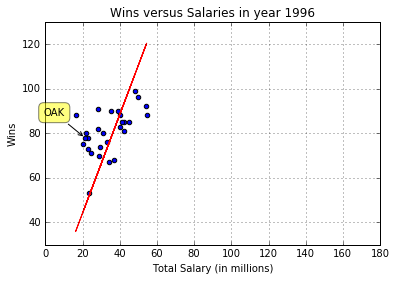

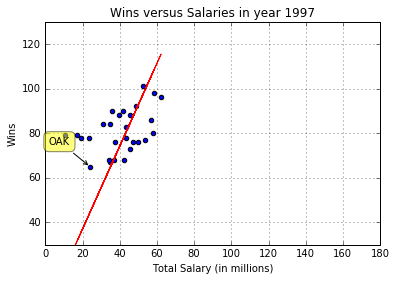

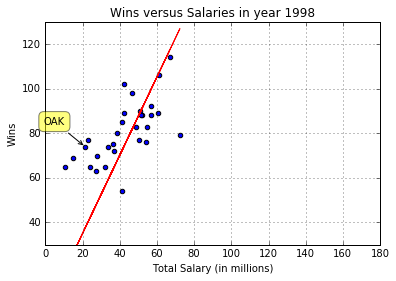

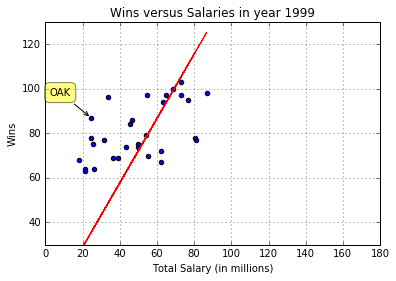

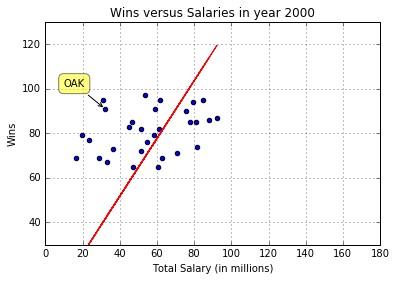

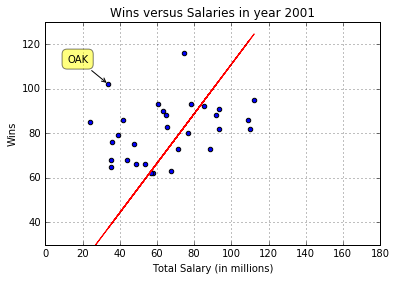

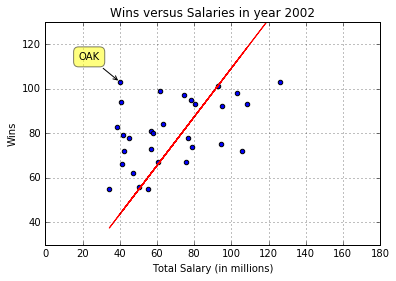

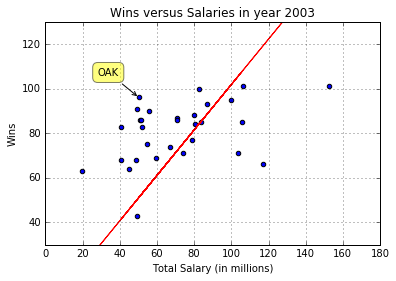

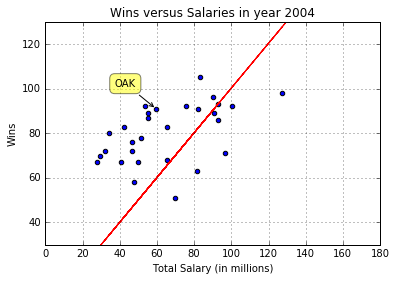

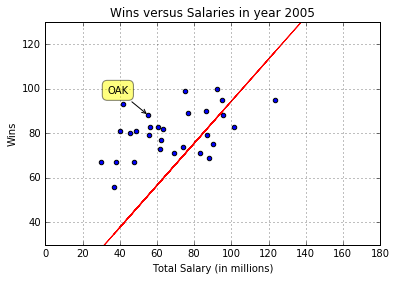

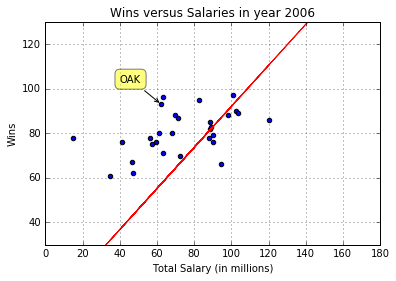

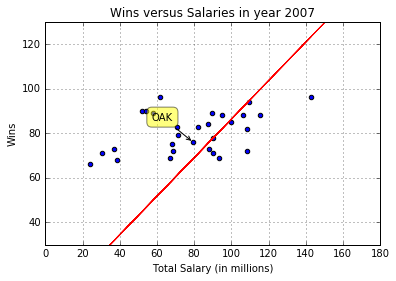

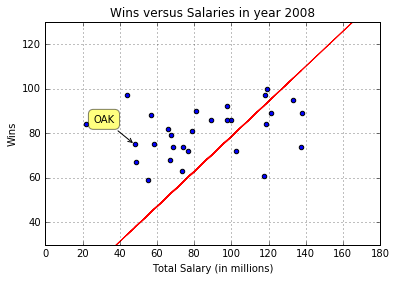

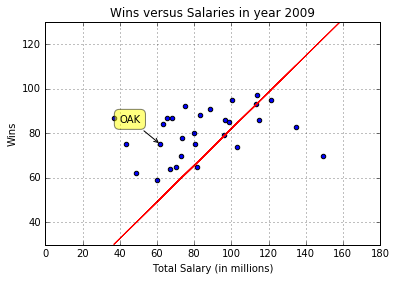

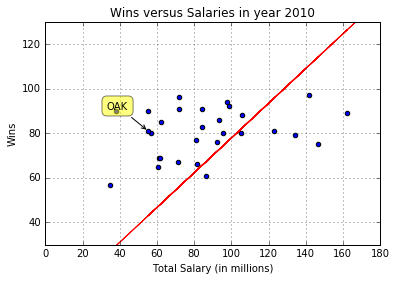

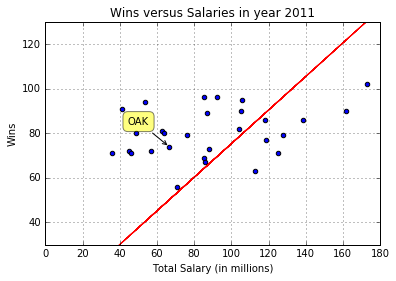

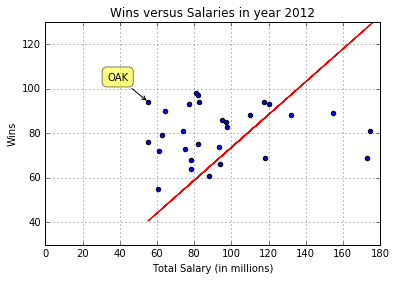

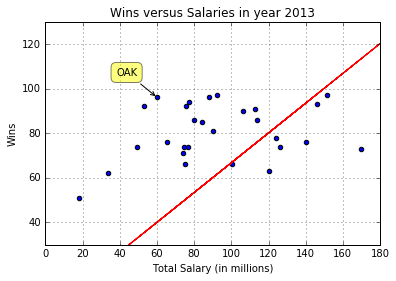

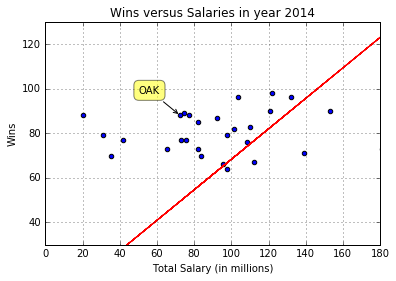

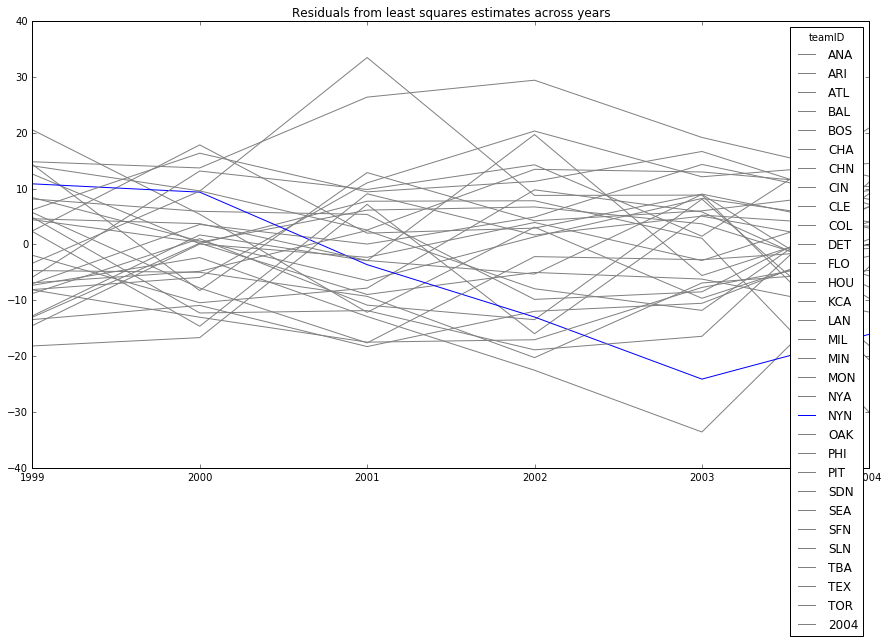

In [45]:
#your code here
teamName = 'OAK'
years = lessColummns['yearID'].unique()
print years
for year in years:
    df = lessColummns[lessColummns['yearID']==year]
    plt.scatter(df.salary/1e6,df.W)
    plt.title('Wins versus Salaries in year ' + str(year))
    plt.xlabel('Total Salary (in millions)')
    plt.ylabel('Wins')
    plt.xlim(0, 180)
    plt.ylim(30, 130)
    plt.grid()
    X = df['salary'] / 1e6
    Y = df['W']
    result = sm.OLS( Y, X ).fit()
    yhat = result.fittedvalues
    resid = result.resid
    residData[yr] = resid
    #resid
    plt.plot(X,yhat, color='red')
    plt.annotate(teamName, 
        xy = (df['salary'][df['teamID'] == teamName] / 1e6,  df['W'][df['teamID'] == teamName]), 
        xytext = (-20, 20), textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', facecolor = 'black' , connectionstyle = 'arc3,rad=0'))
    plt.show()
    
residData.plot(title = 'Residuals from least squares estimates across years', figsize = (15, 8),
               color=map(lambda x: 'blue' if x=='OAK' else 'gray',df.teamID))

#### Problem 1(e):

**For AC209 Students**: Fit a linear regression to the data from each year and obtain the residuals. Plot the residuals against time to detect patterns that support your answer in 1(d). 

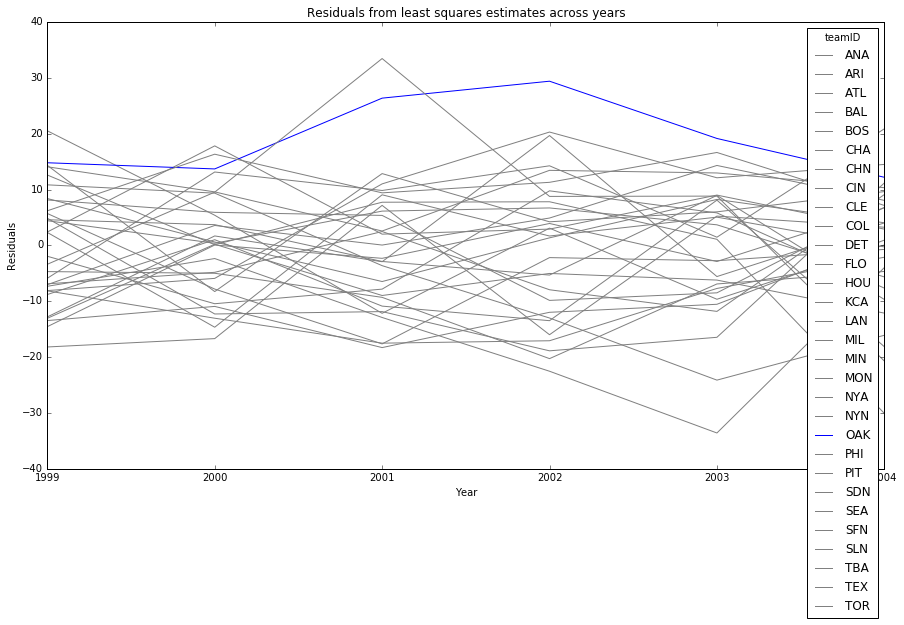

In [12]:
#your code here
teamName = 'OAK'
years = np.arange(1999, 2005)
residData = pd.DataFrame()

for yr in years: 
    df = lessColummns[lessColummns['yearID'] == yr]
    x_list = df['salary'].values / 1e6
    y_list = df['W'].values

    # least squares estimates
    A = np.array([x_list, np.ones(len(x_list))])
    y = y_list
    w = np.linalg.lstsq(A.T,y)[0] # coefficients
    yhat = (w[0]*x_list+w[1]) # regression line
    residData[yr] = y - yhat
  
residData.index = df['teamID']
residData = residData.T
residData.index = residData.index.format()

residData.plot(title = 'Residuals from least squares estimates across years', figsize = (15, 8),
               color=map(lambda x: 'blue' if x=='OAK' else 'gray',df.teamID))
plt.xlabel('Year')
plt.ylabel('Residuals')
plt.show()

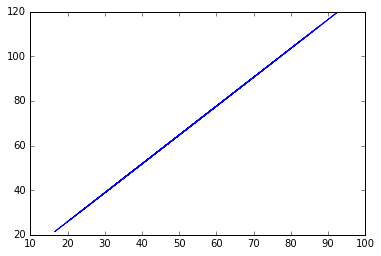

In [35]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

years = np.arange(1999, 2005)
#for yr in years: 
df = lessColummns[lessColummns['yearID'] == 2000]
X = df['salary'].values / 1e6
Y = df['W'].values
result = sm.OLS( Y, X ).fit()
yhat = result.fittedvalues
resid = result.resid
#resid
plt.plot(X,yhat)



## Discussion for Problem 1

*Write a brief discussion of your conclusions to the questions and tasks above in 100 words or less.*

---


## Problem 2

Several media reports have demonstrated the income inequality has increased in the US during this last decade. Here we will look at global data. Use exploratory data analysis to determine if the gap between Africa/Latin America/Asia and Europe/NorthAmerica has increased, decreased or stayed the same during the last two decades. 

#### Problem 2(a)

Using the list of countries by continent from [World Atlas](http://www.worldatlas.com/cntycont.htm) data, load in the `countries.csv` file into a pandas DataFrame and name this data set as `countries`.  This data set can be found on Github in the 2014_data repository [here](https://github.com/cs109/2014_data/blob/master/countries.csv). 

In [46]:
#your code here
req = requests.get("https://raw.githubusercontent.com/cs109/2014_data/master/countries.csv")
data = StringIO.StringIO(req.content.decode('utf-8'))
type(data)
countries = pd.read_csv(data)
countries.head()

,Country,Region
0,Algeria,AFRICA
1,Angola,AFRICA
2,Benin,AFRICA
3,Botswana,AFRICA
4,Burkina,AFRICA


Using the [data available on Gapminder](http://www.gapminder.org/data/), load in the [Income per person (GDP/capita, PPP$ inflation-adjusted)](https://spreadsheets.google.com/pub?key=phAwcNAVuyj1jiMAkmq1iMg&gid=0) as a pandas DataFrame and name this data set as `income`.

**Hint**: Consider using the pandas function `pandas.read_excel()` to read in the .xlsx file directly.

In [47]:
#your code here
#income1 = pd.read_excel("http://spreadsheets.google.com/pub?key=phAwcNAVuyj1jiMAkmq1iMg&output=xls")
#nf = newfile.parse(0)
#print income1.head()
#print "Income prvi: " +str(type(income1))

income_link = 'https://spreadsheets.google.com/pub?key=phAwcNAVuyj1jiMAkmq1iMg&output=xls'
source = StringIO.StringIO(requests.get(income_link).content)
income = pd.read_excel(source, sheetname = "Data")
income.head()


,GDP per capita,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,603.0,603.0,603.0,603.0,603.0,603.0,603.0,603.0,603.0,...,1173.0,1298.0,1311.0,1548.0,1637.0,1695.0,1893.0,1884.0,1877.0,1925.0
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,667.0,667.0,668.0,668.0,668.0,668.0,668.0,668.0,668.0,...,7476.0,7977.0,8644.0,8994.0,9374.0,9640.0,9811.0,9961.0,10160.0,10620.0
4,Algeria,716.0,716.0,717.0,718.0,719.0,720.0,721.0,722.0,723.0,...,12088.0,12289.0,12314.0,12285.0,12494.0,12606.0,12779.0,12893.0,13179.0,13434.0


In [48]:
income.columns

Index([u'GDP per capita',              1800,              1801,
                    1802,              1803,              1804,
                    1805,              1806,              1807,
                    1808,
       ...
                    2006,              2007,              2008,
                    2009,              2010,              2011,
                    2012,              2013,              2014,
                    2015],
      dtype='object', length=217)

Transform the data set to have years as the rows and countries as the columns. Show the head of this data set when it is loaded. 

In [49]:
income = income.set_index('GDP per capita')
transposed = income.transpose()
transposed.head()










GDP per capita,Abkhazia,Afghanistan,Akrotiri and Dhekelia,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,...,North Yemen (former),South Yemen (former),Yemen,Yugoslavia,Zambia,Zimbabwe,Åland,South Sudan,nan,nan
1800,NaN,603.0,NaN,667.0,716.0,NaN,1197.0,618.0,NaN,757.0,...,NaN,NaN,877.0,NaN,663.0,869.0,NaN,507.0,NaN,NaN
1801,NaN,603.0,NaN,667.0,716.0,NaN,1199.0,620.0,NaN,757.0,...,NaN,NaN,879.0,NaN,665.0,870.0,NaN,507.0,NaN,NaN
1802,NaN,603.0,NaN,668.0,717.0,NaN,1201.0,623.0,NaN,757.0,...,NaN,NaN,882.0,NaN,667.0,871.0,NaN,507.0,NaN,NaN
1803,NaN,603.0,NaN,668.0,718.0,NaN,1204.0,626.0,NaN,757.0,...,NaN,NaN,884.0,NaN,668.0,872.0,NaN,507.0,NaN,NaN
1804,NaN,603.0,NaN,668.0,719.0,NaN,1206.0,628.0,NaN,757.0,...,NaN,NaN,887.0,NaN,670.0,873.0,NaN,508.0,NaN,NaN


#### Problem 2(b)

Graphically display the distribution of income per person across all countries in the world for any given year (e.g. 2000).  What kind of plot would be best? 

In [50]:
#your code here
onecountry = transposed.iloc[200]
onecountry

GDP per capita
Abkhazia                         NaN
Afghanistan                    962.0
Akrotiri and Dhekelia            NaN
Albania                       5305.0
Algeria                       9885.0
American Samoa                   NaN
Andorra                      31662.0
Angola                        3387.0
Anguilla                         NaN
Antigua and Barbuda          19319.0
Argentina                    11504.0
Armenia                       2919.0
Aruba                        43703.0
Australia                    35253.0
Austria                      38548.0
Azerbaijan                    4459.0
Bahamas                      25858.0
Bahrain                      45063.0
Bangladesh                    1632.0
Barbados                     14677.0
Belarus                       7300.0
Belgium                      37404.0
Belize                        7215.0
Benin                         1525.0
Bermuda                      51140.0
Bhutan                        3596.0
Bolivia                

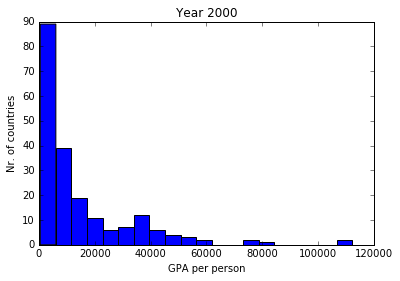

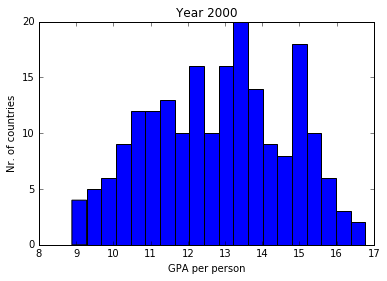

In [51]:
type(transposed)
#onecountry.plot.hist(bins=20)
plt.plot(subplots="True")
plt.hist(onecountry.dropna(),bins=20)
plt.title('Year 2000')
plt.ylabel('Nr. of countries')
plt.xlabel('GPA per person')
plt.show()

plt.hist(np.log2(onecountry.dropna()),bins=20)
plt.title('Year 2000')
plt.xlabel('GPA per person')
plt.ylabel('Nr. of countries')
plt.show()

#### Problem 2(c)

Write a function to merge the `countries` and `income` data sets for any given year. 

In [52]:
"""
Function
--------
mergeByYear

Return a merged DataFrame containing the income, 
country name and region for a given year. 

Parameters
----------
year : int
    The year of interest

Returns
-------
a DataFrame
   A pandas DataFrame with three columns titled 
   'Country', 'Region', and 'Income'. 

Example
-------
>>> mergeByYear(2010)
"""
#your code here
def mergeByYear(year):
    data = pd.DataFrame(transposed.iloc[year].values, columns =['Income'])
    data['Country']= transposed.columns
    joined = pd.merge(data,countries,how="inner",on=['Country'])
    joined.Income = np.round(joined.Income, 2)
    return joined
mergeByYear(210).head()

,Income,Country,Region
0,1637.0,Afghanistan,ASIA
1,9374.0,Albania,EUROPE
2,12494.0,Algeria,AFRICA
3,38982.0,Andorra,EUROPE
4,7047.0,Angola,AFRICA


#### Problem 2(d) 

Use exploratory data analysis tools such as histograms and boxplots to explore the distribution of the income per person by region data set from 2(c) for a given year. Describe how these change through the recent years?

**Hint**: Use a `for` loop to consider multiple years.  

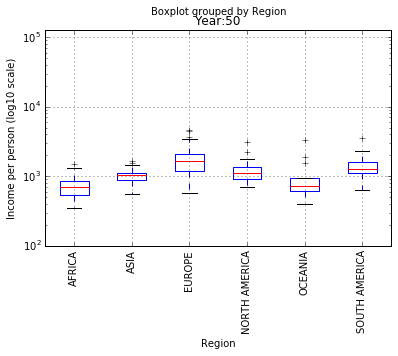

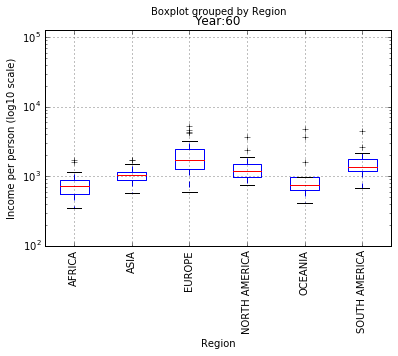

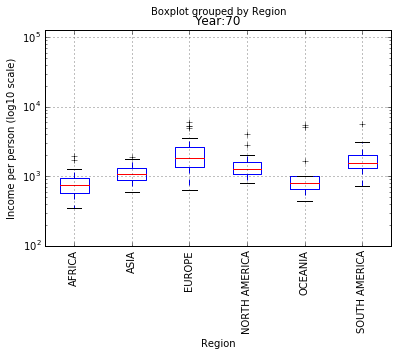

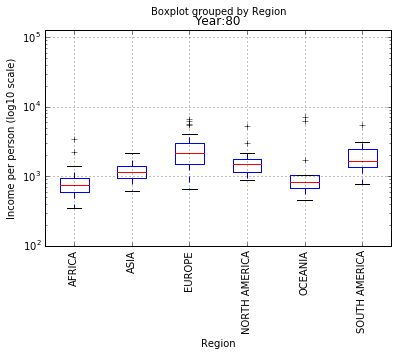

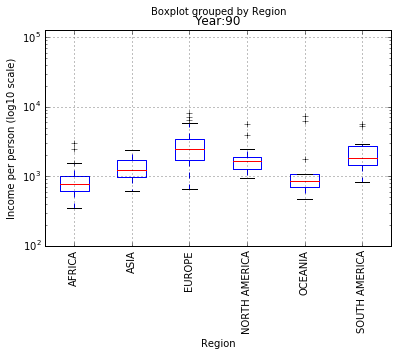

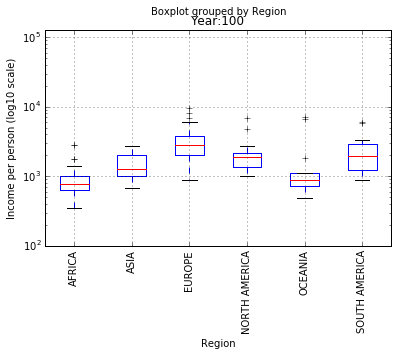

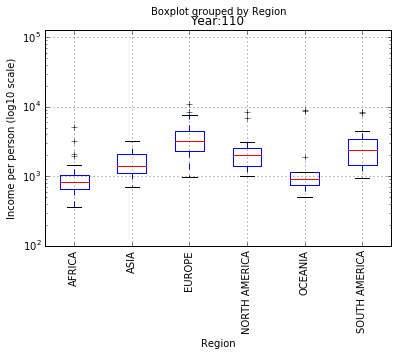

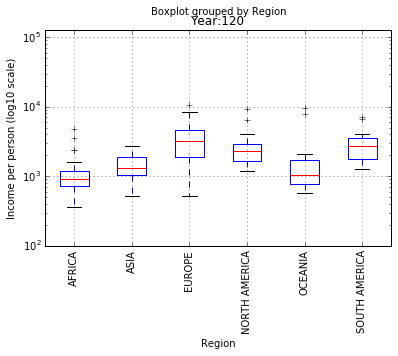

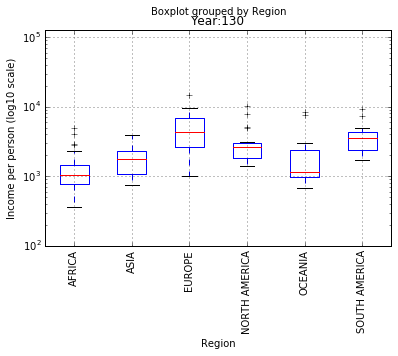

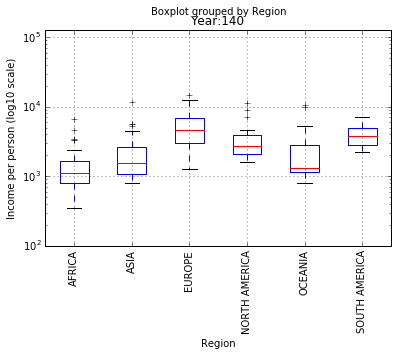

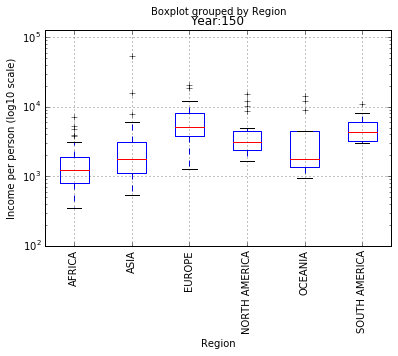

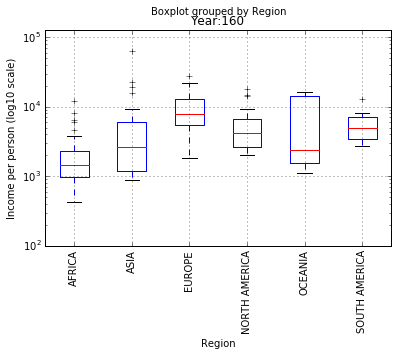

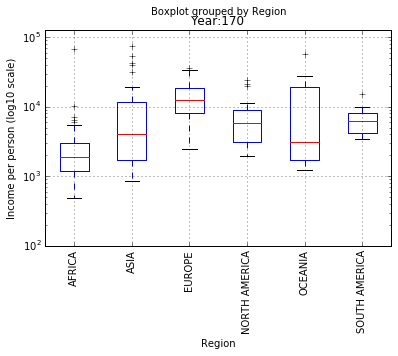

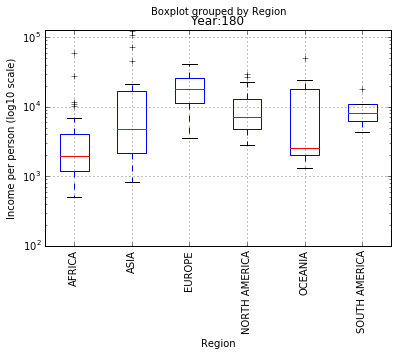

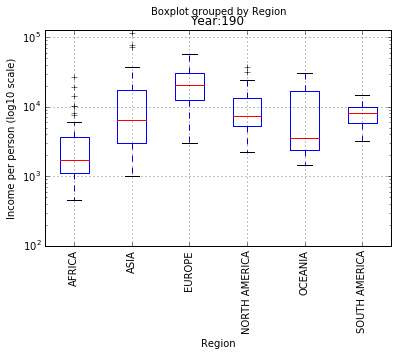

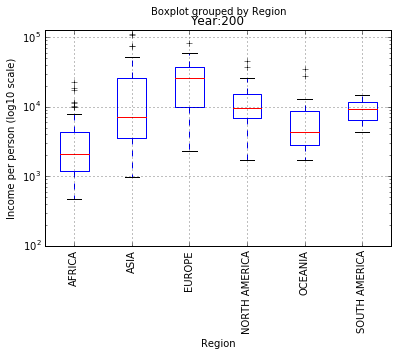

In [72]:
#your code here
years = np.arange(50, 201, 10)

for yr in years:
    df = mergeByYear(yr)
    df.boxplot('Income', by = 'Region', rot = 90)
    plt.title("Year:" + str(yr))
    plt.ylabel('Income per person (log10 scale)')
    plt.ylim(10**2, 10.5 **5)
    plt.yscale('log')

## Discussion for Problem 2

*Write a brief discussion of your conclusions to the questions and tasks above in 100 words or less.*

---


## Problem 3

In general, if group A has larger values than group B on average, does this mean the largest values are from group A? Discuss after completing each of the problems below. 

#### Problem 3(a)

Assume you have two list of numbers, X and Y, with distribution approximately normal. X and Y have standard deviation equal to 1, but the average of X is different from the average of Y.  If the difference in the average of X and the average of Y is larger than 0, how does the proportion of X > a compare to the proportion of Y > a? 

Write a function that analytically calculates the ratio of these two proportions: Pr(X > a)/Pr(Y > a) as function of the difference in the average of X and the average of Y. 

**Hint**: Use the `scipy.stats` module for useful functions related to a normal random variable such as the probability density function, cumulative distribution function and survival function. 

**Update**: Assume Y is normally distributed with mean equal to 0. 

Show the curve for different values of a (a = 2,3,4 and 5).

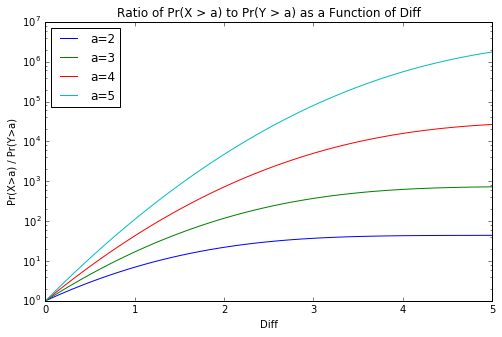

In [96]:
"""
Function
--------
ratioNormals

Return ratio of these two proportions: 
    Pr(X > a)/Pr(Y > a) as function of 
    the difference in the average of X 
    and the average of Y. 

Parameters
----------
diff : difference in the average of X 
    and the average of Y. 
a : cutoff value

Returns
-------
Returns ratio of these two proportions: 
    Pr(X > a)/Pr(Y > a)
    
Example
-------
>>> ratioNormals(diff = 1, a = 2)
"""
"""
Function
--------
ratioNormals

Return ratio of these two proportions: 
    Pr(X > a)/Pr(Y > a) as function of 
    the difference in the average of X 
    and the average of Y. 

Parameters
----------
diff : difference in the average of X 
    and the average of Y. 
a : cutoff value

Returns
-------
Returns ratio of these two proportions: 
    Pr(X > a)/Pr(Y > a)
    
Example
-------
>>> ratioNormals(diff = 1, a = 2)
"""
#your code here

def ratioNormals(diff, a):
    X = scipy.stats.norm(loc=diff, scale=1)
    Y = scipy.stats.norm(loc=0, scale=1) 
    return X.sf(a) / Y.sf(a)

#your code here

# let diff range from 0 to 5 
diffs = np.linspace(0, 5, 50)
a_values = range(2,6)

# Plot separate curves for 
# Pr(X > a) / Pr(Y > a) as a function of diff
# for all given values of a
plt.figure(figsize=(8,5));
for a in a_values:
    ratios = [ratioNormals(diff, a) for diff in diffs]
    plt.plot(diffs, ratios)
    
# Labels
plt.legend(["a={}".format(a) for a in a_values], loc=0);
plt.xlabel('Diff');
plt.ylabel('Pr(X>a) / Pr(Y>a)');
plt.title('Ratio of Pr(X > a) to Pr(Y > a) as a Function of Diff');

# Using a log scale so you can actually see the curves
plt.yscale('log')

In [13]:
#your code here

#### Problem 3(b)

Now consider the distribution of income per person from two regions: Asia and South America. Estimate the average income per person across the countries in those two regions. Which region has the larger average of income per person across the countries in that region? 

**Update**: Use the year 2012. 

In [100]:
#your code here
merged = mergeByYear(212).groupby('Region', as_index=False).mean()
merged = merged.loc[(merged.Region == "ASIA") | (merged.Region == "SOUTH AMERICA")]
merged

,Region,Income
1,ASIA,23500.432432
5,SOUTH AMERICA,13015.750000


#### Problem 3(c) 

Calculate the proportion of countries with income per person that is greater than 10,000 dollars. Which region has a larger proportion of countries with income per person greater than 10,000 dollars? If the answer here is different from the answer in 3(b), explain why in light of your answer to 3(a).

**Update**: Use the year 2012. 

In [111]:
#your code here
merged = mergeByYear(212)
high_income =merged[merged.Income>10000]
high = high_income.Income.count()
nr_countries = merged.Country.count()
float(high)/float(nr_countries)

0.5340909090909091

#### Problem 3(d)

**For AC209 Students**: Re-run this analysis in Problem 3 but compute the average income per person for each region, instead of the average of the reported incomes per person across countries in the region. Why are these two different? Hint: use this [data set](https://spreadsheets.google.com/pub?key=phAwcNAVuyj0XOoBL_n5tAQ&gid=0). 

In [16]:
#your code here

## Discussion for Problem 3

*Write a brief discussion of your conclusions to the questions and tasks above in 100 words or less.*

---
